In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
f = open('WhatsApp Chat with Kkw TE Comp 22-23 Officia-1.txt', encoding='utf-8')

In [4]:
data = f.read()
#This is all stored in type string.
print(data)

12/08/21, 19:14 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/08/21, 13:55 - +91 93736 93150 created group "Kkw SEComp21-22 Official"
12/08/21, 19:14 - You joined using this group's invite link
12/08/21, 19:14 - +91 70586 24769 joined using this group's invite link
12/08/21, 19:14 - +91 90759 92677 joined using this group's invite link
12/08/21, 19:14 - Chinmay joined using this group's invite link
12/08/21, 19:14 - Pranav Lature joined using this group's invite link
12/08/21, 19:17 - +91 75883 04016, +91 77091 48204, +91 77678 96363, +91 77749 43085, +91 94036 01473 and +91 94037 03326 were added
12/08/21, 19:17 - +91 70571 82463 joined using this group's invite link
12/08/21, 19:24 - Pratham Singh Kkw joined using this group's invite link
12/08/21, 19:26 - +91 84596 73717 joined using this group's invite link
12/08/21, 19:27 - Pratik joined using this group's invite link
12/08/21, 19:28

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

In [7]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})

#converting message_date format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date' : 'date'}, inplace=True)

In [8]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-08-12 19:14:00
1,"+91 93736 93150 created group ""Kkw SEComp21-22...",2021-08-11 13:55:00
2,You joined using this group's invite link\n,2021-08-12 19:14:00
3,+91 70586 24769 joined using this group's invi...,2021-08-12 19:14:00
4,+91 90759 92677 joined using this group's invi...,2021-08-12 19:14:00


In [9]:
#Display the no. of Rows and columns
df.shape

(2710, 2)

In [10]:
#separating users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry [1:]: #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        #if there is no : in user_message simply adding them as group notification
        users.append('group notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace= True)

df.head()

,date,user,message
0,2021-08-12 19:14:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2021-08-11 13:55:00,group notification,"+91 93736 93150 created group ""Kkw SEComp21-22..."
2,2021-08-12 19:14:00,group notification,You joined using this group's invite link\n
3,2021-08-12 19:14:00,group notification,+91 70586 24769 joined using this group's invi...
4,2021-08-12 19:14:00,group notification,+91 90759 92677 joined using this group's invi...


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

#Future Purpose if required
#df.drop(columns=['user_message'], inplace= False)


In [12]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-08-12 19:14:00,group notification,Messages and calls are end-to-end encrypted. N...,2021,August,12,19,14
1,2021-08-11 13:55:00,group notification,"+91 93736 93150 created group ""Kkw SEComp21-22...",2021,August,11,13,55
2,2021-08-12 19:14:00,group notification,You joined using this group's invite link\n,2021,August,12,19,14
3,2021-08-12 19:14:00,group notification,+91 70586 24769 joined using this group's invi...,2021,August,12,19,14
4,2021-08-12 19:14:00,group notification,+91 90759 92677 joined using this group's invi...,2021,August,12,19,14


In [13]:
#Total messages of a Particular Person 
df[df['user'] == 'Hitesh Patil']

,date,user,message,year,month,day,hour,minute
588,2022-04-13 20:17:00,Hitesh Patil,Done\n,2022,April,13,20,17
1288,2022-08-06 12:23:00,Hitesh Patil,Hitesh Patil TE A 52\n,2022,August,6,12,23
1649,2022-09-14 12:01:00,Hitesh Patil,Congratulations✨\n,2022,September,14,12,1
1841,2022-10-21 18:34:00,Hitesh Patil,Done\n,2022,October,21,18,34
1942,2022-10-27 18:15:00,Hitesh Patil,<Media omitted>\n,2022,October,27,18,15
2305,2023-02-07 10:49:00,Hitesh Patil,<Media omitted>\n,2023,February,7,10,49
2324,2023-02-11 13:56:00,Hitesh Patil,<Media omitted>\n,2023,February,11,13,56
2325,2023-02-11 14:43:00,Hitesh Patil,<Media omitted>\n,2023,February,11,14,43


In [14]:
#Total Number of Words
words = []
for message in df['message']:
    words.extend(message.split())
    #append generating list inside list so using extend
len(words)

20598

In [15]:
#Total number of links shared
from urlextract import URLExtract
extractor = URLExtract()
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

ModuleNotFoundError: No module named 'urlextract'

In [16]:
#Finding the most active users in a group (Group Only)
x = df['user'].value_counts().head()
x

some mentor idk       338
+91 99223 60509       158
CC Kkwagh             144
group notification    136
+91 94052 09881        86
Name: user, dtype: int64

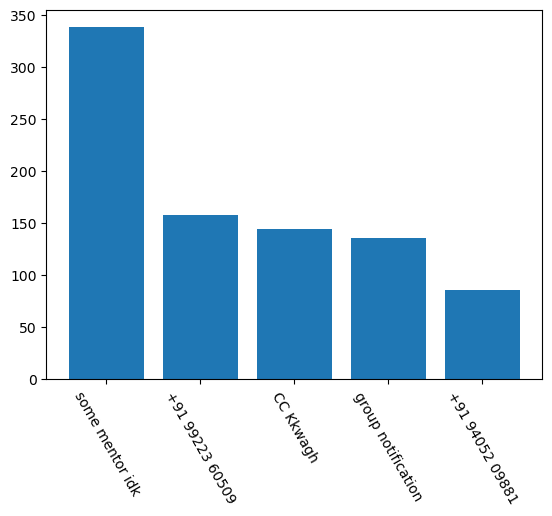

In [17]:
name = x.index
count = x.values

plt.bar(name,count)
plt.xticks(rotation=-60)
plt.show()

In [18]:
#Finding the most active users in a group (Group Only)
#In Percentage
round((df['user'].value_counts()/df.shape[0])*100,2)

some mentor idk       12.47
+91 99223 60509        5.83
CC Kkwagh              5.31
group notification     5.02
+91 94052 09881        3.17
                      ...  
+91 70205 93518        0.04
+91 83088 87381        0.04
+91 77200 08280        0.04
+91 77964 41596        0.04
+91 82082 40374        0.04
Name: user, Length: 185, dtype: float64

In [19]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,some mentor idk,12.47
1,+91 99223 60509,5.83
2,CC Kkwagh,5.31
3,group notification,5.02
4,+91 94052 09881,3.17
...,...,...
180,+91 70205 93518,0.04
181,+91 83088 87381,0.04
182,+91 77200 08280,0.04
183,+91 77964 41596,0.04


In [20]:
#Finding top 20 most common words

words = []
for message in df['message']:
    words.extend(message.split())

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,to,490
1,the,375
2,and,352
3,<Media,342
4,omitted>,342
5,Congratulations,303
6,for,297
7,of,249
8,in,189
9,students,182


In [21]:
#Removing Group Notifications
#Removing '<Media omitted>\n'
#Removing Stop Words
#Cannot use NLTK stop word because Whatsapp chats are in Marathi + English + Hindi

temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,congratulations,321
1,students,216
2,message,144
3,deleted,141
4,+91,134
5,link,129
6,group's,105
7,joined,103
8,invite,101
9,dear,99


In [23]:
import emoji
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [26]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,🥳,218
1,✨,167
2,👍,133
3,🎉,130
4,💫,101
...,...,...
56,🫡,1
57,🙋,1
58,♂,1
59,🥹,1


<BarContainer object of 5 artists>

/home/penguin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/penguin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/penguin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/penguin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/penguin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_i

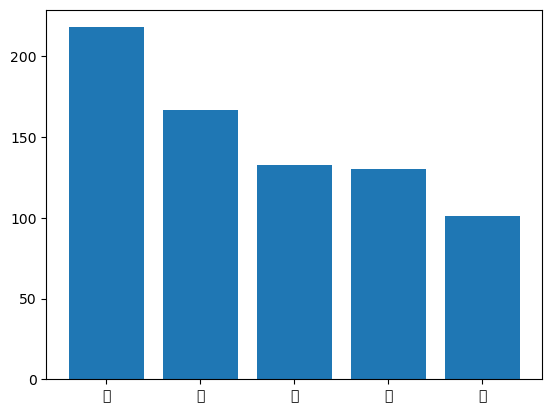

In [27]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [35]:
#Creating a timeline
df['month_num'] = df['date'].dt.month
timeline  = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2021,8,August,178
1,2021,11,November,6
2,2021,12,December,192
3,2022,1,January,82
4,2022,4,April,250
5,2022,5,May,191
6,2022,6,June,75
7,2022,7,July,234
8,2022,8,August,307
9,2022,9,September,208


In [36]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = time

In [37]:
timeline

,year,month_num,month,message,time
0,2021,8,August,178,August-2021
1,2021,11,November,6,November-2021
2,2021,12,December,192,December-2021
3,2022,1,January,82,January-2022
4,2022,4,April,250,April-2022
5,2022,5,May,191,May-2022
6,2022,6,June,75,June-2022
7,2022,7,July,234,July-2022
8,2022,8,August,307,August-2022
9,2022,9,September,208,September-2022


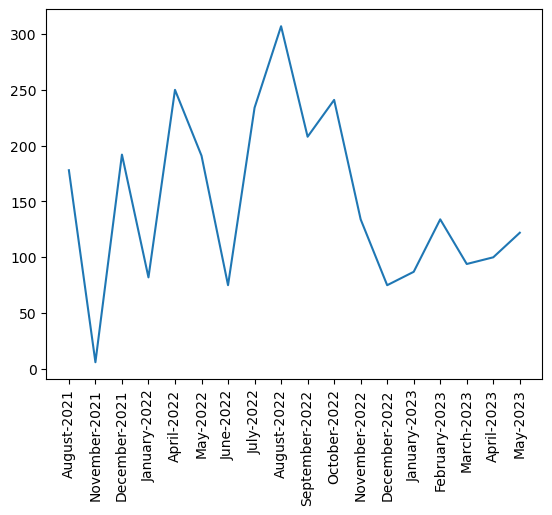

In [44]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

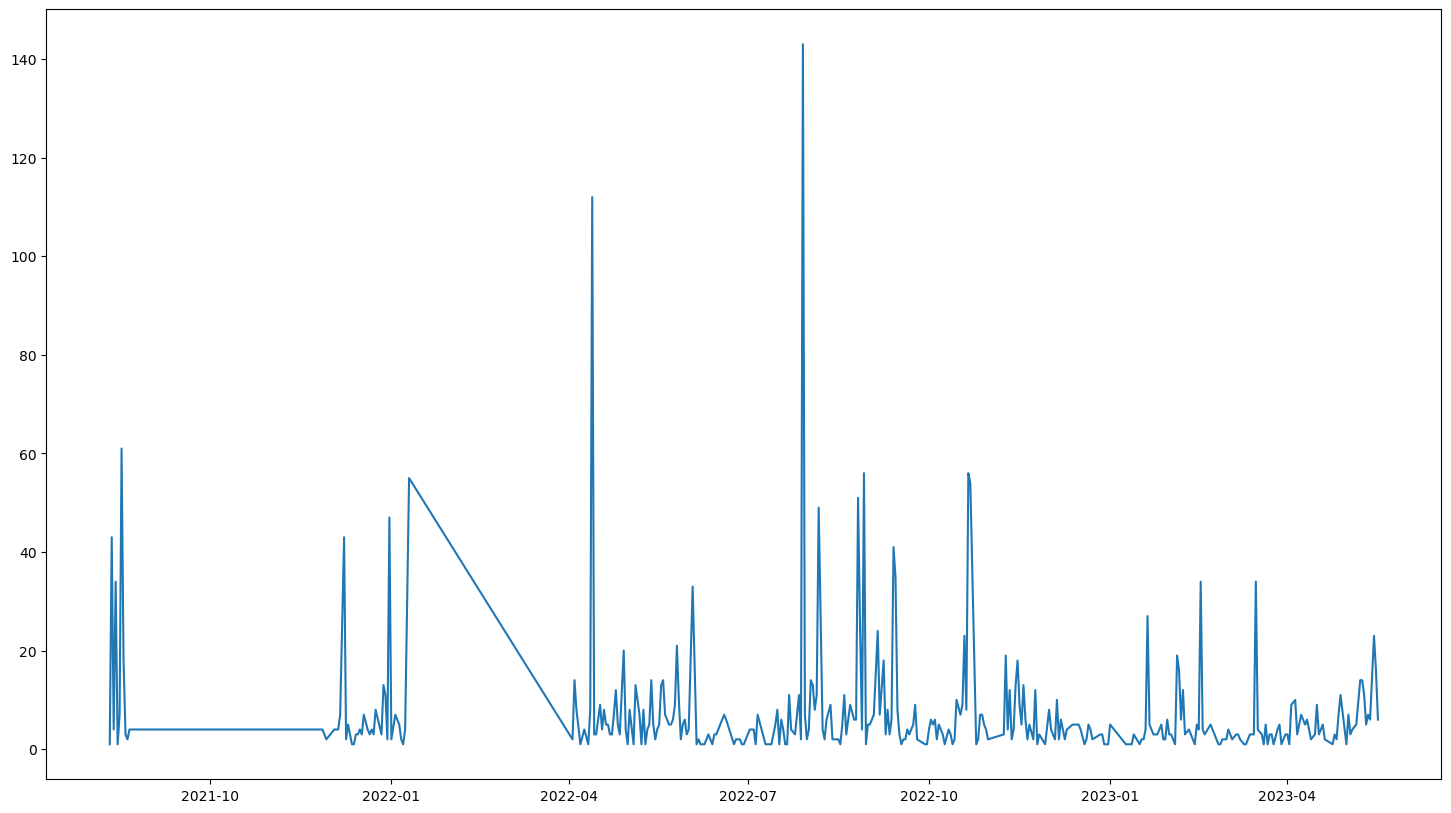

In [52]:
#Daily Timeline
df['only_date'] = df['date'].dt.date
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [56]:
#Finding week activity
df['day_name'] = df['date'].dt.day_name()
week_activity = df['day_name'].value_counts().reset_index()
week_activity

,index,day_name
0,Friday,606
1,Wednesday,474
2,Monday,407
3,Saturday,390
4,Tuesday,363
5,Thursday,345
6,Sunday,125


In [60]:
plt.plot(week_activity[0],week_activity[1])

KeyError: 0

In [62]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2021-08-12 19:14:00,group notification,Messages and calls are end-to-end encrypted. N...,2021,August,12,19,14,8,2021-08-12,Thursday,19-20
1,2021-08-11 13:55:00,group notification,"+91 93736 93150 created group ""Kkw SEComp21-22...",2021,August,11,13,55,8,2021-08-11,Wednesday,13-14
2,2021-08-12 19:14:00,group notification,You joined using this group's invite link\n,2021,August,12,19,14,8,2021-08-12,Thursday,19-20
3,2021-08-12 19:14:00,group notification,+91 70586 24769 joined using this group's invi...,2021,August,12,19,14,8,2021-08-12,Thursday,19-20
4,2021-08-12 19:14:00,group notification,+91 90759 92677 joined using this group's invi...,2021,August,12,19,14,8,2021-08-12,Thursday,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...
2705,2023-05-17 07:22:00,+91 94038 35023,<Media omitted>\n,2023,May,17,7,22,5,2023-05-17,Wednesday,7-8
2706,2023-05-17 07:22:00,+91 94038 35023,Please share it with all the students\n,2023,May,17,7,22,5,2023-05-17,Wednesday,7-8
2707,2023-05-17 15:45:00,+91 94212 80541,"Roll no 57, 59 to 64 contact me immediately.\n",2023,May,17,15,45,5,2023-05-17,Wednesday,15-16
2708,2023-05-17 16:15:00,+91 94212 80541,👆from B division\n,2023,May,17,16,15,5,2023-05-17,Wednesday,16-17


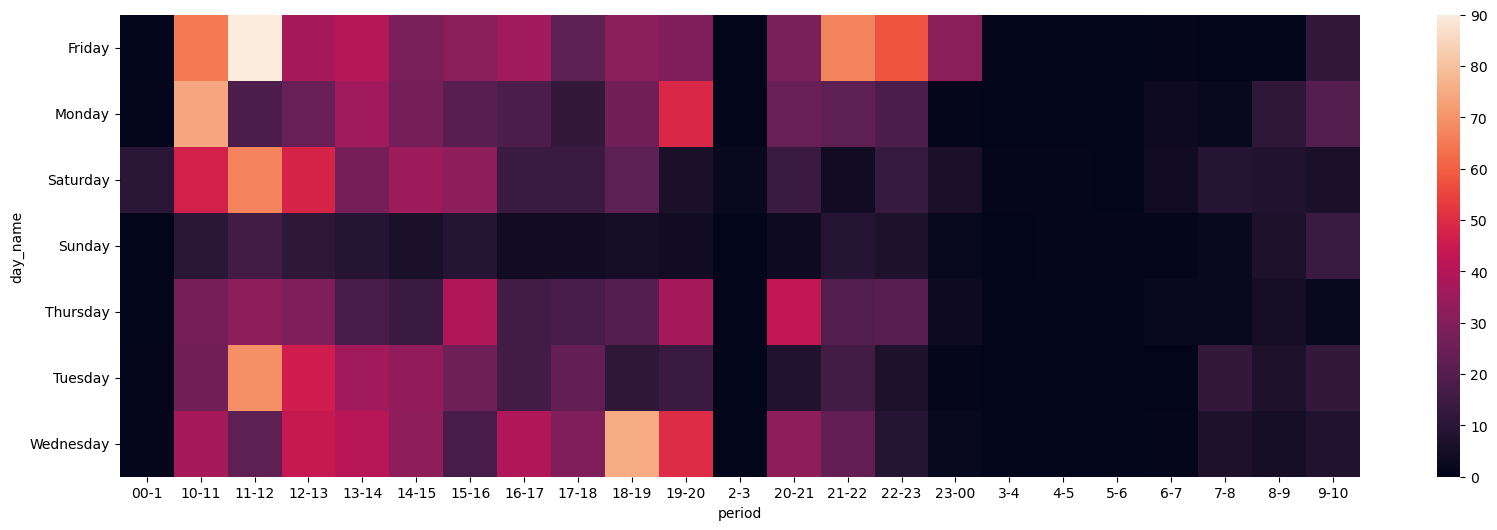

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()
